## import

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns

from sklearn.cluster import KMeans

import plotly.express as px

from mlxtend.evaluate import bias_variance_decomp

In [90]:
missing_values = ["n/a", "na"," ","-", "_" ,"--", "NaN", "NA"]
df = pd.read_csv("project_data (1).csv", sep=";",na_values = missing_values)
df

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [91]:
df.isnull().sum().sum()

0

In [92]:
df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X01     1000 non-null   object
 1   X02     1000 non-null   int64 
 2   X03     1000 non-null   object
 3   X04     1000 non-null   object
 4   X05     1000 non-null   int64 
 5   X06     1000 non-null   object
 6   X07     1000 non-null   object
 7   X08     1000 non-null   int64 
 8   X09     1000 non-null   object
 9   X10     1000 non-null   object
 10  X11     1000 non-null   int64 
 11  X12     1000 non-null   object
 12  X13     1000 non-null   int64 
 13  X14     1000 non-null   object
 14  X15     1000 non-null   object
 15  X16     1000 non-null   int64 
 16  X17     1000 non-null   object
 17  X18     1000 non-null   int64 
 18  X19     1000 non-null   object
 19  X20     1000 non-null   object
 20  Y       1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB
None


In [94]:
cleanup= {      "X01":     {"A11": 1, "A12": 2, "A13": 3, "A14": 4},
                "X03":     {"A30": 0, "A31": 1, "A32": 2, "A33": 3, "A34": 4},        
                "X04":     {"A40": 0, "A41": 1, "A42": 2, "A43": 3, "A44": 4, "A45": 5, "A46": 6, "A47": 7, "A48": 8, "A49": 9, "A410": 10},
                "X06":     {"A61": 1, "A62": 2, "A63": 3, "A64": 4, "A65": 5},
                "X07":     {"A71": 1, "A72": 2, "A73": 3, "A74": 4, "A75": 5},
                "X09":     {"A91": 1, "A92": 2, "A93": 3, "A94": 4, "A95": 5},
                "X10":     {"A101": 1, "A102": 2, "A103": 3},
                "X12":     {"A121": 1, "A122": 2, "A123": 3, "A124": 4},
                "X14":     {"A141": 1, "A142": 2, "A143": 3},
                "X15":     {"A151": 1, "A152": 2, "A153": 3},
                "X17":     {"A171": 1, "A172": 2, "A173": 3, "A174": 4},
                "X19":     {"A191": 1, "A192": 2},
                "X20":     {"A201": 1, "A202": 2},
               }

In [95]:
df = df.replace(cleanup)
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2


In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X01     1000 non-null   int64
 1   X02     1000 non-null   int64
 2   X03     1000 non-null   int64
 3   X04     1000 non-null   int64
 4   X05     1000 non-null   int64
 5   X06     1000 non-null   int64
 6   X07     1000 non-null   int64
 7   X08     1000 non-null   int64
 8   X09     1000 non-null   int64
 9   X10     1000 non-null   int64
 10  X11     1000 non-null   int64
 11  X12     1000 non-null   int64
 12  X13     1000 non-null   int64
 13  X14     1000 non-null   int64
 14  X15     1000 non-null   int64
 15  X16     1000 non-null   int64
 16  X17     1000 non-null   int64
 17  X18     1000 non-null   int64
 18  X19     1000 non-null   int64
 19  X20     1000 non-null   int64
 20  Y       1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB
None


In [97]:
import plotly.graph_objs as go
import plotly.offline as py 
py.init_notebook_mode(connected=True)  

### Exploring the target variable distribution

In [98]:
trace0 = go.Bar(
            x = df[df["Y"]== 1]["Y"].value_counts().index.values,
            y = df[df["Y"]== 1]["Y"].value_counts().values,
            name='Good cust')

trace1 = go.Bar(
            x = df[df["Y"]== 2]["Y"].value_counts().index.values,
            y = df[df["Y"]== 2]["Y"].value_counts().values,
            name='Bad cust')


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Customers'
    ),
    title='GOOD / BAD Customer'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig, filename='grouped-bar')

### Good/Bad credit dist

In [99]:
df_good = df[df["Y"] == 1]
df_bad = df[df["Y"] == 2]

x1 = np.log(df_good['X05'])
x2 = np.log(df_bad["X05"])

# Group data together
hist_data = [x1, x2] 

group_labels = ['Good Credit', 'Bad Credit']
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.1, colors=colors)

# Plot!
py.iplot(fig, filename='Good/Bad credit dist')

### Numerical Variable Analysis

In [100]:
numerical_cols = [1, 5, 8, 11, 13, 16, 18]


### credit amount dist

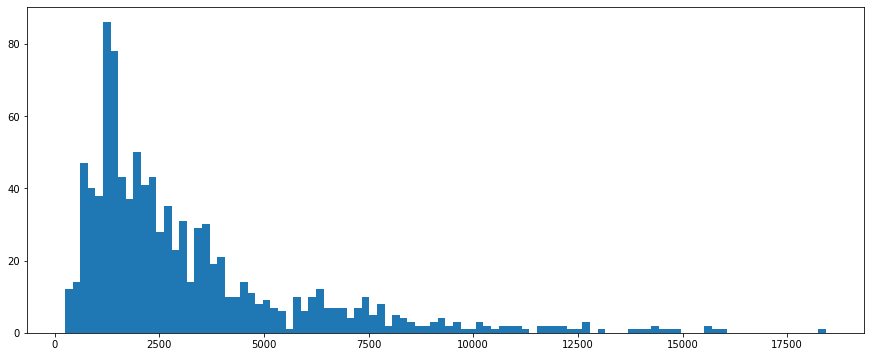

In [101]:
plt.figure(figsize=(15, 6))

x = df["X05"]
plt.hist(x, bins = 100)

plt.show()

### dutration dist

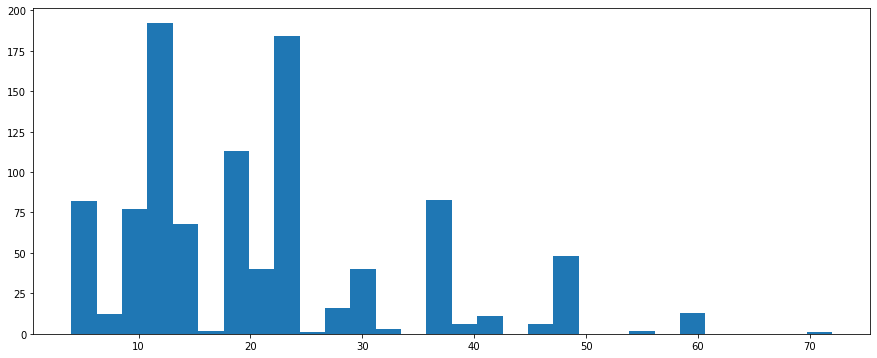

In [102]:
plt.figure(figsize=(15, 6))

x = df["X02"]
plt.hist(x, bins = 30)

plt.show()

In [103]:
df["X02"].value_counts()


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: X02, dtype: int64

In [104]:
import plotly.tools as tls  

In [105]:
df_good = df.loc[df["Y"] == 1]['X13']
df_bad = df.loc[df["Y"] == 2]['X13']
df_age = df['X13']

Good = go.Histogram(
    x=df_good,
    name="Good Credit"
)

Bad = go.Histogram(
    x=df_bad,
    name="Bad Credit"
)

Gen = go.Histogram(
    x=df_age,
    name="Overall Age"
)

fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

fig.append_trace(Good, 1, 1)
fig.append_trace(Bad, 1, 2)
fig.append_trace(Gen, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### Credit amout / Age

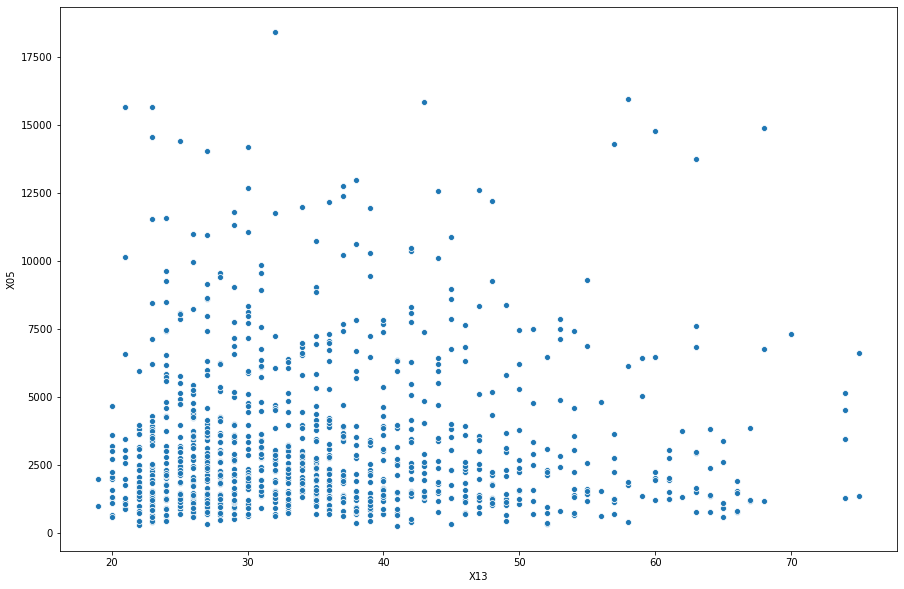

In [106]:
#tips = sns.load_dataset("tips")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="X13", y="X05")

### Credit amout / duration

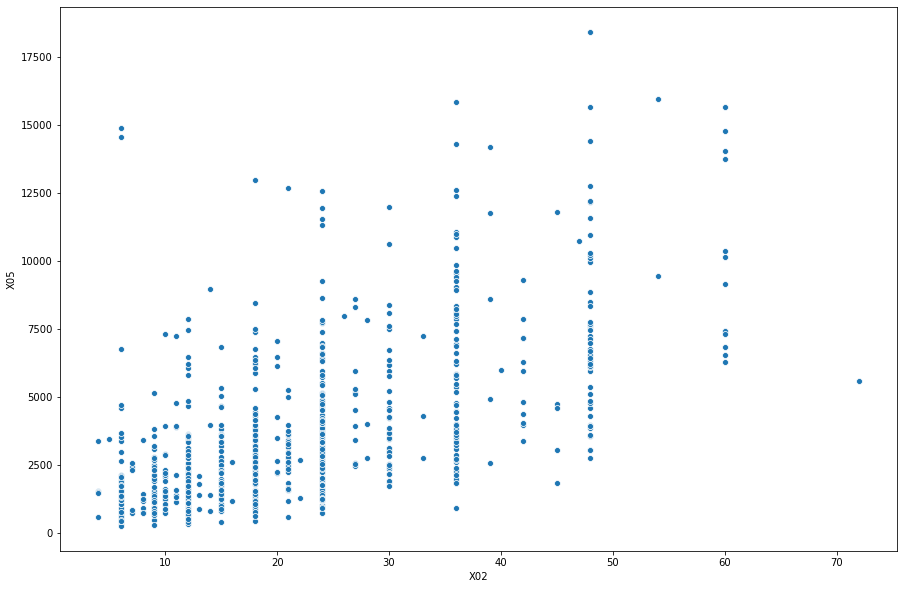

In [107]:
#tips = sns.load_dataset("tips")
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="X02", y="X05")

### Housing / customer 


In [108]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X15"].value_counts().index.values,
    y = df[df["Y"]== 1]["X15"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X15"].value_counts().index.values,
    y = df[df["Y"]== 2]["X15"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='Housing Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='Housing-Grouped')

### Personal status and sex of the customer

In [109]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X09"].value_counts().index.values,
    y = df[df["Y"]== 1]["X09"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X09"].value_counts().index.values,
    y = df[df["Y"]== 2]["X09"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='Personal status Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='Personal status-Grouped')

In [110]:
df["X09"].value_counts()
## new dont have any single female  :/ 

3    548
2    310
4     92
1     50
Name: X09, dtype: int64

## Job situation distr

In [111]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X17"].value_counts().index.values,
    y = df[df["Y"]== 1]["X17"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X17"].value_counts().index.values,
    y = df[df["Y"]== 2]["X17"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='job-Grouped')

  ### checking account dest

In [112]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X01"].value_counts().index.values,
    y = df[df["Y"]== 1]["X01"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X01"].value_counts().index.values,
    y = df[df["Y"]== 2]["X01"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='checking account Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='checking account-Grouped')

### Savings dist 

In [113]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X06"].value_counts().index.values,
    y = df[df["Y"]== 1]["X06"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X06"].value_counts().index.values,
    y = df[df["Y"]== 2]["X06"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='savings Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='savings-Grouped')

### guarantors dist

In [114]:
Good = go.Bar(
    x = df[df["Y"]== 1]["X10"].value_counts().index.values,
    y = df[df["Y"]== 1]["X10"].value_counts().values,
    name='Good credit'
)

Bad = go.Bar(
    x = df[df["Y"]== 2]["X10"].value_counts().index.values,
    y = df[df["Y"]== 2]["X10"].value_counts().values,
    name="Bad Credit"
)

data = [Good, Bad]

layout = go.Layout(
    title='savings Distribuition'
)

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='savings-Grouped')

### Housing x Job - Dist

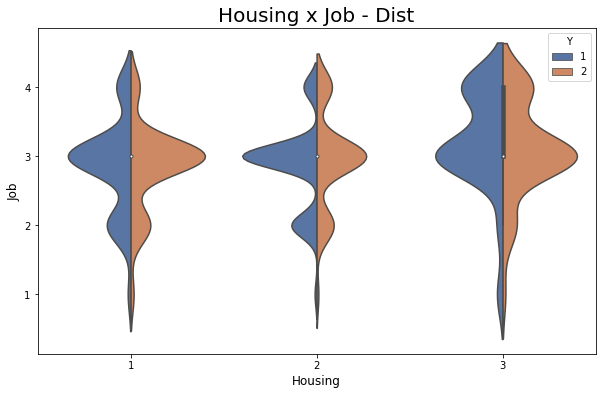

In [115]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="X15",y="X17",data=df,
                   hue="Y", palette="deep", as_cmap=True, split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

### employment duration x residence duration

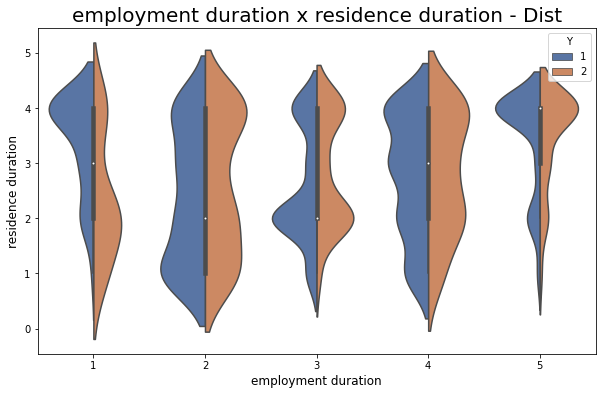

In [116]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="X07",y="X11",data=df,
                   hue="Y", palette="deep", as_cmap=True, split=True)
g.set_xlabel("employment duration", fontsize=12)
g.set_ylabel("residence duration", fontsize=12)
g.set_title("employment duration x residence duration - Dist", fontsize=20)

plt.show()

### Credit history x amount of the credit dist

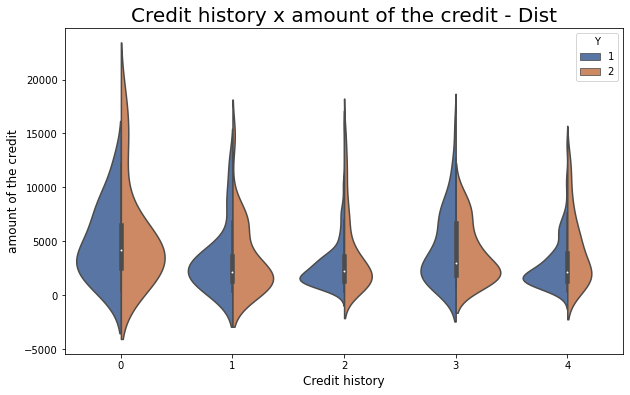

In [117]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="X03",y="X05",data=df,
                   hue="Y", palette="deep", as_cmap=True, split=True)
g.set_xlabel("Credit history", fontsize=12)
g.set_ylabel("amount of the credit", fontsize=12)
g.set_title("Credit history x amount of the credit - Dist", fontsize=20)

plt.show()

### Property owned x Installment rate - Dist

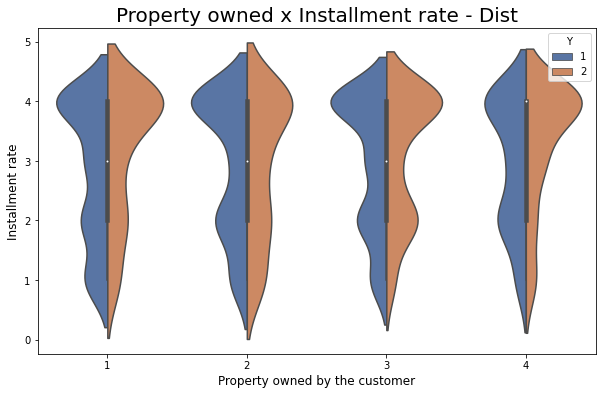

In [118]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="X12",y="X08",data=df,
                   hue="Y", palette="deep", as_cmap=True, split=True)
g.set_xlabel("Property owned by the customer", fontsize=12)
g.set_ylabel("Installment rate", fontsize=12)
g.set_title("Property owned x Installment rate - Dist", fontsize=20)

plt.show()

## standardization

In [119]:
from sklearn.preprocessing import StandardScaler
X = df.drop("Y",1).values
y = df["Y"].values
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LGR: 0.881755 (0.027334)
KNN: 0.881755 (0.048268)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CART: 0.757510 (0.040803)
NB: 0.763551 (0.053103)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



RF: 0.912408 (0.018428)
SVM: 0.914367 (0.034013)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.




XGBM: 0.855184 (0.051350)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



LGBM: 0.873510 (0.051552)


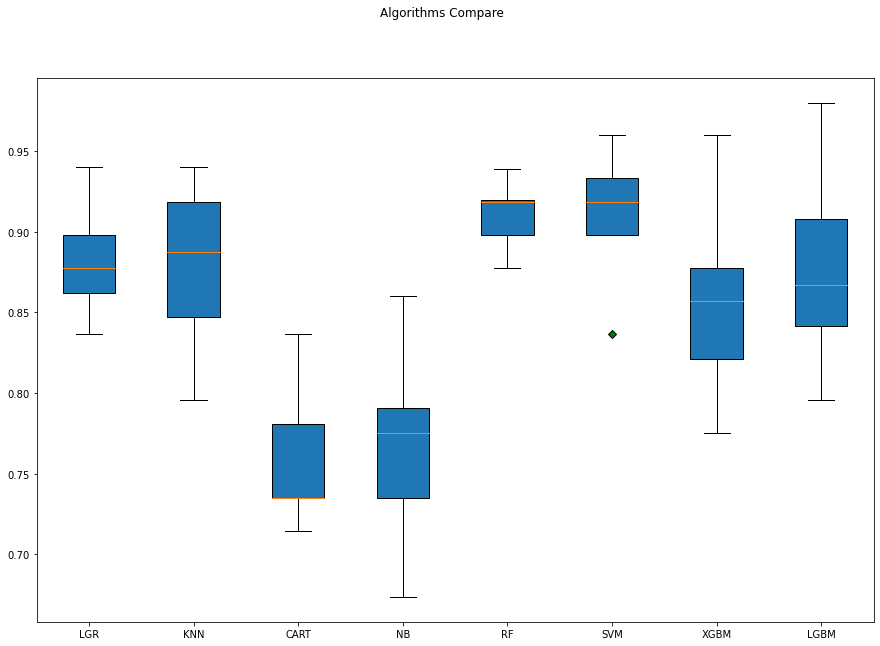

In [121]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGBM', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithms Compare')
ax = fig.add_subplot(111)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(results, flierprops=green_diamond, patch_artist=True)
ax.set_xticklabels(names)
plt.show()

Best accuracy score 0.7733333333333333 achieved at C 0.3313306613226453


SVC(C=0.3313306613226453, kernel='linear')

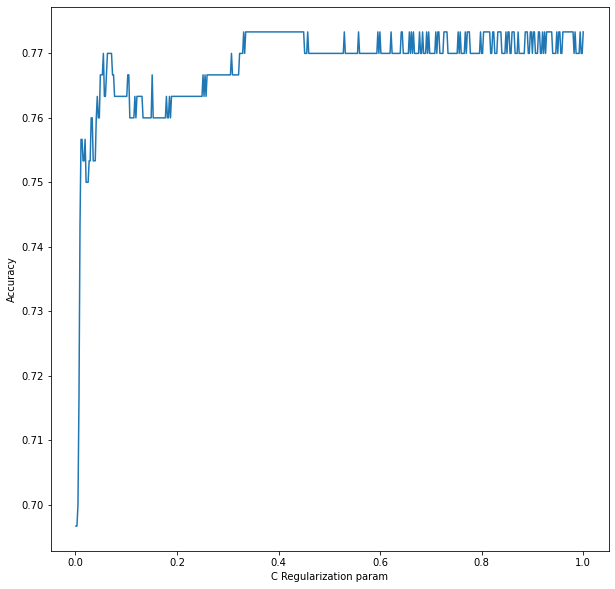

In [122]:
from sklearn.metrics import accuracy_score


accuracy_scores = []
Cs = []

for C in np.linspace(0.001, 1, 500):
    model = SVC(C = C, kernel = 'linear')
    model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    Cs.append(C)
    accuracy_scores.append(test_accuracy)
    
plt.figure(figsize = (10, 10))
ax = sns.lineplot(x = Cs, y = accuracy_scores)
ax.set(xlabel = 'C Regularization param', ylabel = 'Accuracy')
print(f'Best accuracy score {max(accuracy_scores)} achieved at C {Cs[np.argmax(accuracy_scores)]}')

svm_model = SVC(C = Cs[np.argmax(accuracy_scores)], kernel = 'linear')
svm_model.fit(X_train, y_train)

In [123]:
svm_model = SVC(C =0.03, kernel = 'linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


mse, bias, var = bias_variance_decomp(svm_model, X_train, y_train, X_test, y_test, num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,y_pred)),"\n")

MSE: 0.246
Bias: 0.250
Variance: 0.078
Test predict accuracy score: 0.75 



In [124]:
import itertools

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Test predict accuracy score: 0.76 

Confusion matrix
[[187  22]
 [ 51  40]]


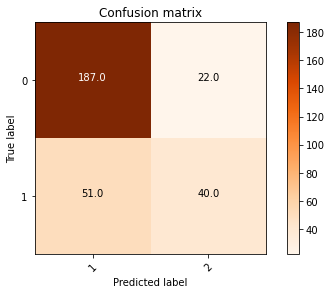

In [125]:
y_pred = svm_model.predict(X_test)

print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,y_pred)),"\n")

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()


## RF

In [126]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [127]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators=50, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)



RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [128]:
pred=rfc1.predict(X_test)

mse, bias, var = bias_variance_decomp(rfc1, X_train, y_train, X_test, y_test, num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,y_pred)),"\n")

MSE: 0.255
Bias: 0.240
Variance: 0.078
Test predict accuracy score: 0.76 



Test predict accuracy score: 0.74 

Confusion matrix
[[194  15]
 [ 63  28]]


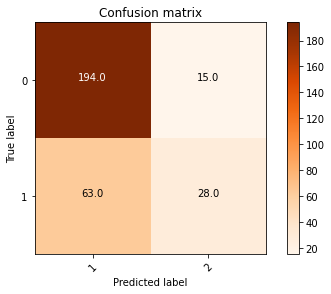

In [129]:

print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,pred)),"\n")

cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

## logistic regression


In [130]:
grid = {'C':np.logspace(-5,5,20), 'penalty': ['l1', 'l2','elasticnet']}
# C and penalty are logistic regression regularization parameters
# If C is too small model is underfitted, if C is too big model is overfitted.
# l1 and l2 are regularization loss functions (l1=lasso, l2=ridge)

# Creating the model:
lr = LogisticRegression() 

# Creating GridSearchCV model:
lr_cv = GridSearchCV(lr, grid, cv=10) # Using lr model, grid parameters and cross validation of 10 (10 times of accuracy calculation will be applied) 

# Training the model:
lr_cv.fit(X_train, y_train)

print('best paremeters for logistic regression: ', lr_cv.best_params_)
print('best score for logistic regression after grid search cv:', lr_cv.best_score_)
lr_cv.best_params_["C"]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. 

best paremeters for logistic regression:  {'C': 0.1623776739188721, 'penalty': 'l2'}
best score for logistic regression after grid search cv: 0.75


0.1623776739188721

In [159]:
#lr_tuned = LogisticRegression(C=lr_cv.best_params_["C"], penalty=lr_cv.best_params_["penalty"])
lr_tuned = LogisticRegression(C=0.01, penalty=lr_cv.best_params_["penalty"])

lr_tuned.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [160]:
pred=lr_tuned.predict(X_test)

mse, bias, var = bias_variance_decomp(lr_tuned, X_train, y_train, X_test, y_test, num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 0.258
Bias: 0.260
Variance: 0.045


Test predict accuracy score: 0.76 

Confusion matrix
[[190  19]
 [ 52  39]]


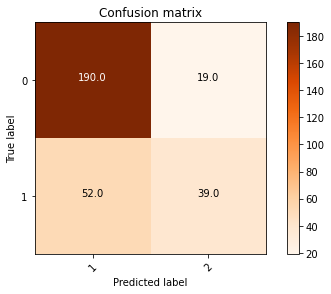

In [45]:
print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,pred)),"\n")

cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

### KNN

In [161]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [162]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.7585714285714287
{'n_neighbors': 15, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=15, weights='distance')


In [175]:
knn_tuned = KNeighborsClassifier(n_neighbors= 100, weights = 'distance')
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [177]:
pred=knn_tuned.predict(X_test)

mse, bias, var = bias_variance_decomp(knn_tuned, X_train, y_train, X_test, y_test, num_rounds=200, random_seed=1)
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)


MSE: 0.280
Bias: 0.280
Variance: 0.039


Test predict accuracy score: 0.76 

Confusion matrix
[[198  11]
 [ 61  30]]


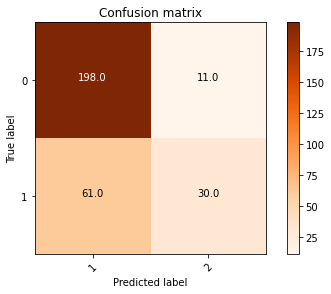

In [50]:
print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test,pred)),"\n")

cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()